# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Дополнительное домашнее задание 1. Байесовские оценки и АБ тестирование
### Дедлайн --- 21 декабря 9:00


In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns

from scipy import stats as sps
sns.set(style="darkgrid", font_scale=1.4)
%config InlineBackend.figure_format='retina'

## Задача 1 (20 баллов)

Байесовская оценка для распределения Бернулли то есть бета-распределение.

а) Оценка параметра 

Сгенерируйте выборки из распределения Бернулли размера $200$ с параметрами $0.3,\ 0.5,\ 0.9$. 

In [ ]:
SAMPLE_SIZE = 200
thetas = [0.3, 0.5, 0.9]

bern_samples = np.zeros((3, SAMPLE_SIZE))
for i in range(len(thetas)):
  bern_samples[i, :] = sps.bernoulli(thetas[i]).rvs(size=200)
print(bern_samples.shape)

(3, 200)


Реализуйте метод `get_estimator` класса `BayesEstimator` который возвращает байесовскую оценку (распределения) для данной выборки. Учтите что в `__init__` указаны параметры априорного распределения.

Если считать, что априорное распределение это $Beta(\alpha, \beta)$, то апостериорное распределение будет также $Beta$, однако с параметрами 

$$
\alpha_{posterior} = \alpha + \sum_{i=1}^n X_i, \beta_{posterior}=\beta + n - \sum_{i=1}^n X_i
$$

In [ ]:
class BayesEstimator:
    def __init__(self, prior_alpha: float = 1, prior_beta: float = 1):
        self._prior_alpha = prior_alpha
        self._prior_beta = prior_beta

    def get_estimator(self, sample: np.ndarray):
        posterior_alpha = self._prior_alpha + np.sum(sample)
        posterior_beta = self._prior_beta + len(sample) - np.sum(sample)
        posterior = sps.beta(posterior_alpha, posterior_beta)
        return posterior

Для каждой выборки создайте свой экземпляр класса `BayesEstimator`. Для каждого $n \leq 200$ постройте график плотности апостериорного распределения соответствующего цвета. Также зафиксируйте среднее и $\alpha/2$ и $(1 - \alpha/2)$ квантили, $\alpha=0.05$ для всех вышеупомянутых $n$. Они вам понадобятся в следующем пункте.

In [ ]:
means = np.zeros((3, SAMPLE_SIZE))
lower_bound = np.zeros((3, SAMPLE_SIZE))
upper_bound = np.zeros((3, SAMPLE_SIZE))
alpha = 0.05

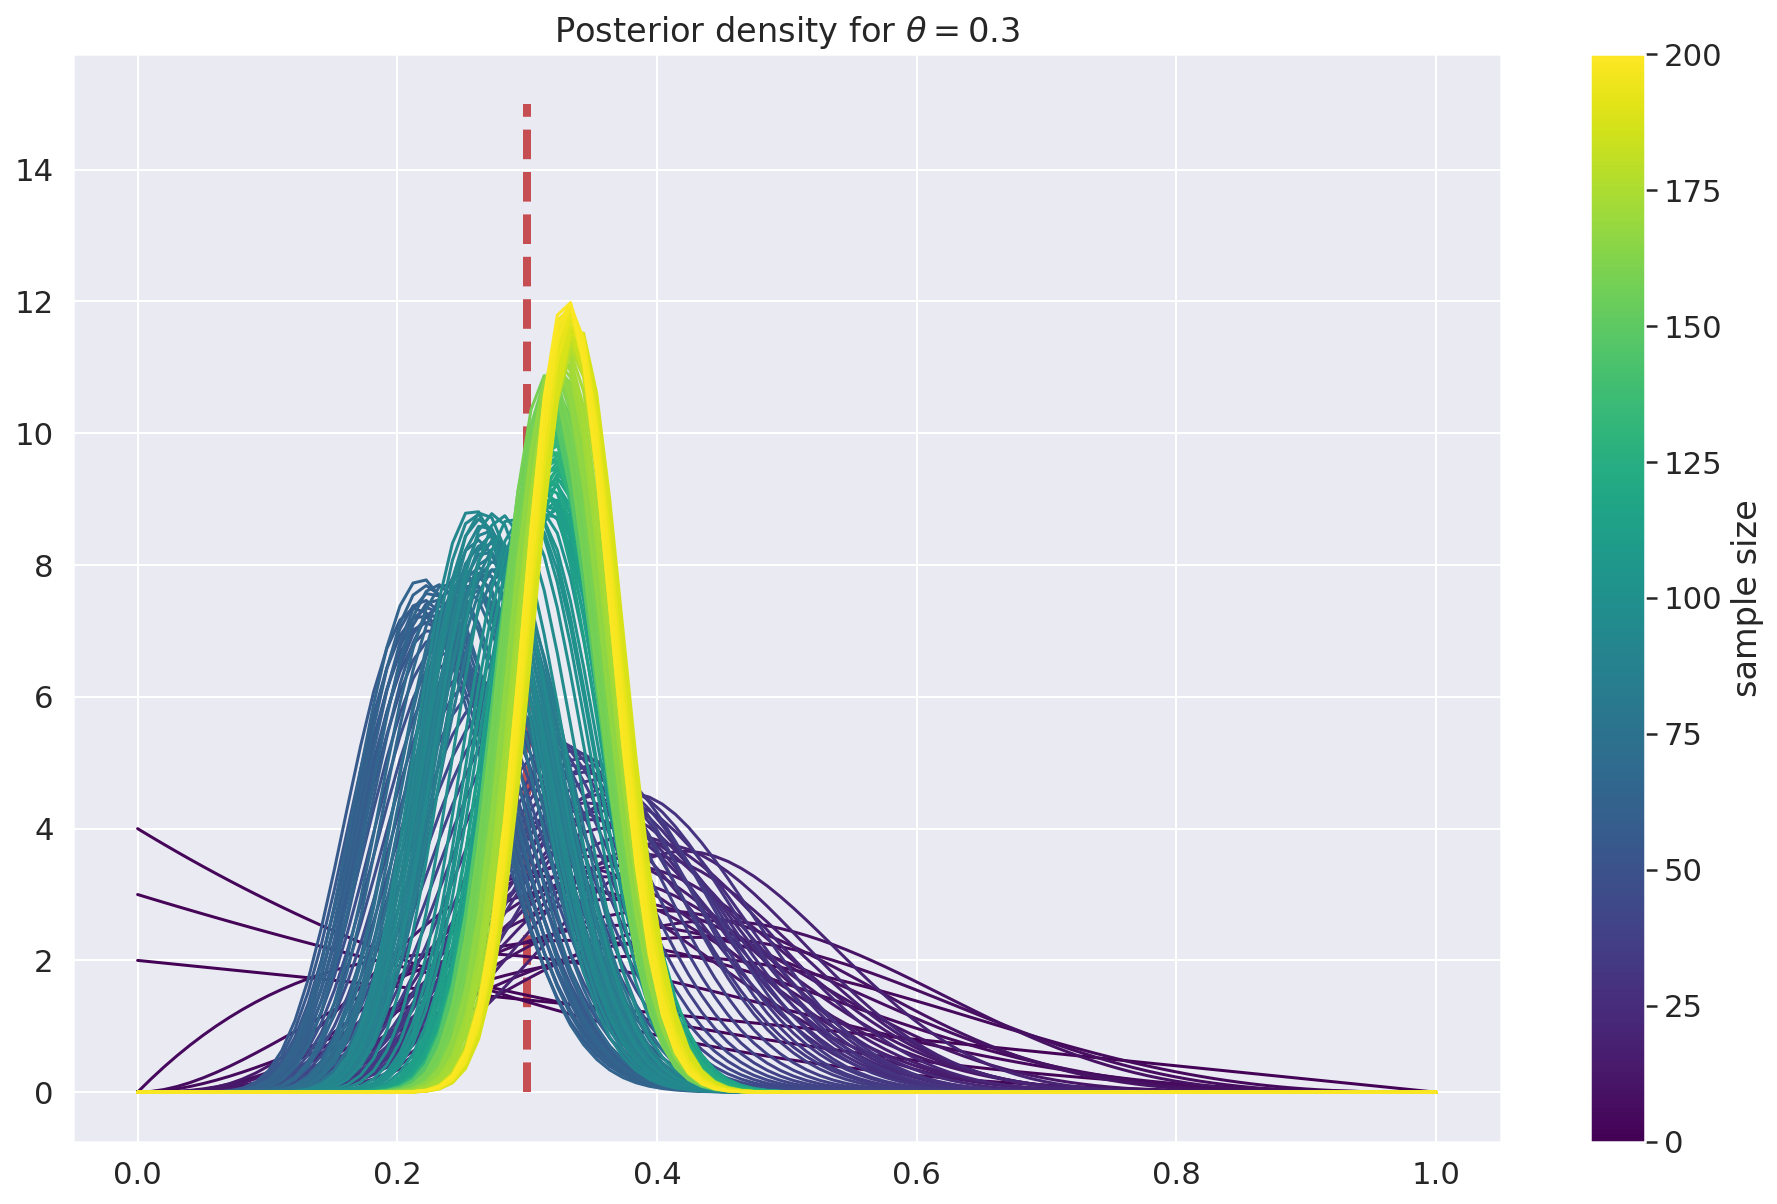

In [ ]:
x = np.linspace(0, 1, 100)

palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[0][:i + 1])
    means[0][i] = estimator.mean()
    lower_bound[0][i] = estimator.ppf(alpha/2)
    upper_bound[0][i] = estimator.ppf(1- alpha/2)
    plt.plot(x, estimator.pdf(x), color=palette[i])

norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="sample size")
plt.title(r"Posterior density for $\theta = 0.3$")
plt.vlines(0.3, 0, 15, linestyle="dashed", colors="r", linewidth=4)
plt.show()

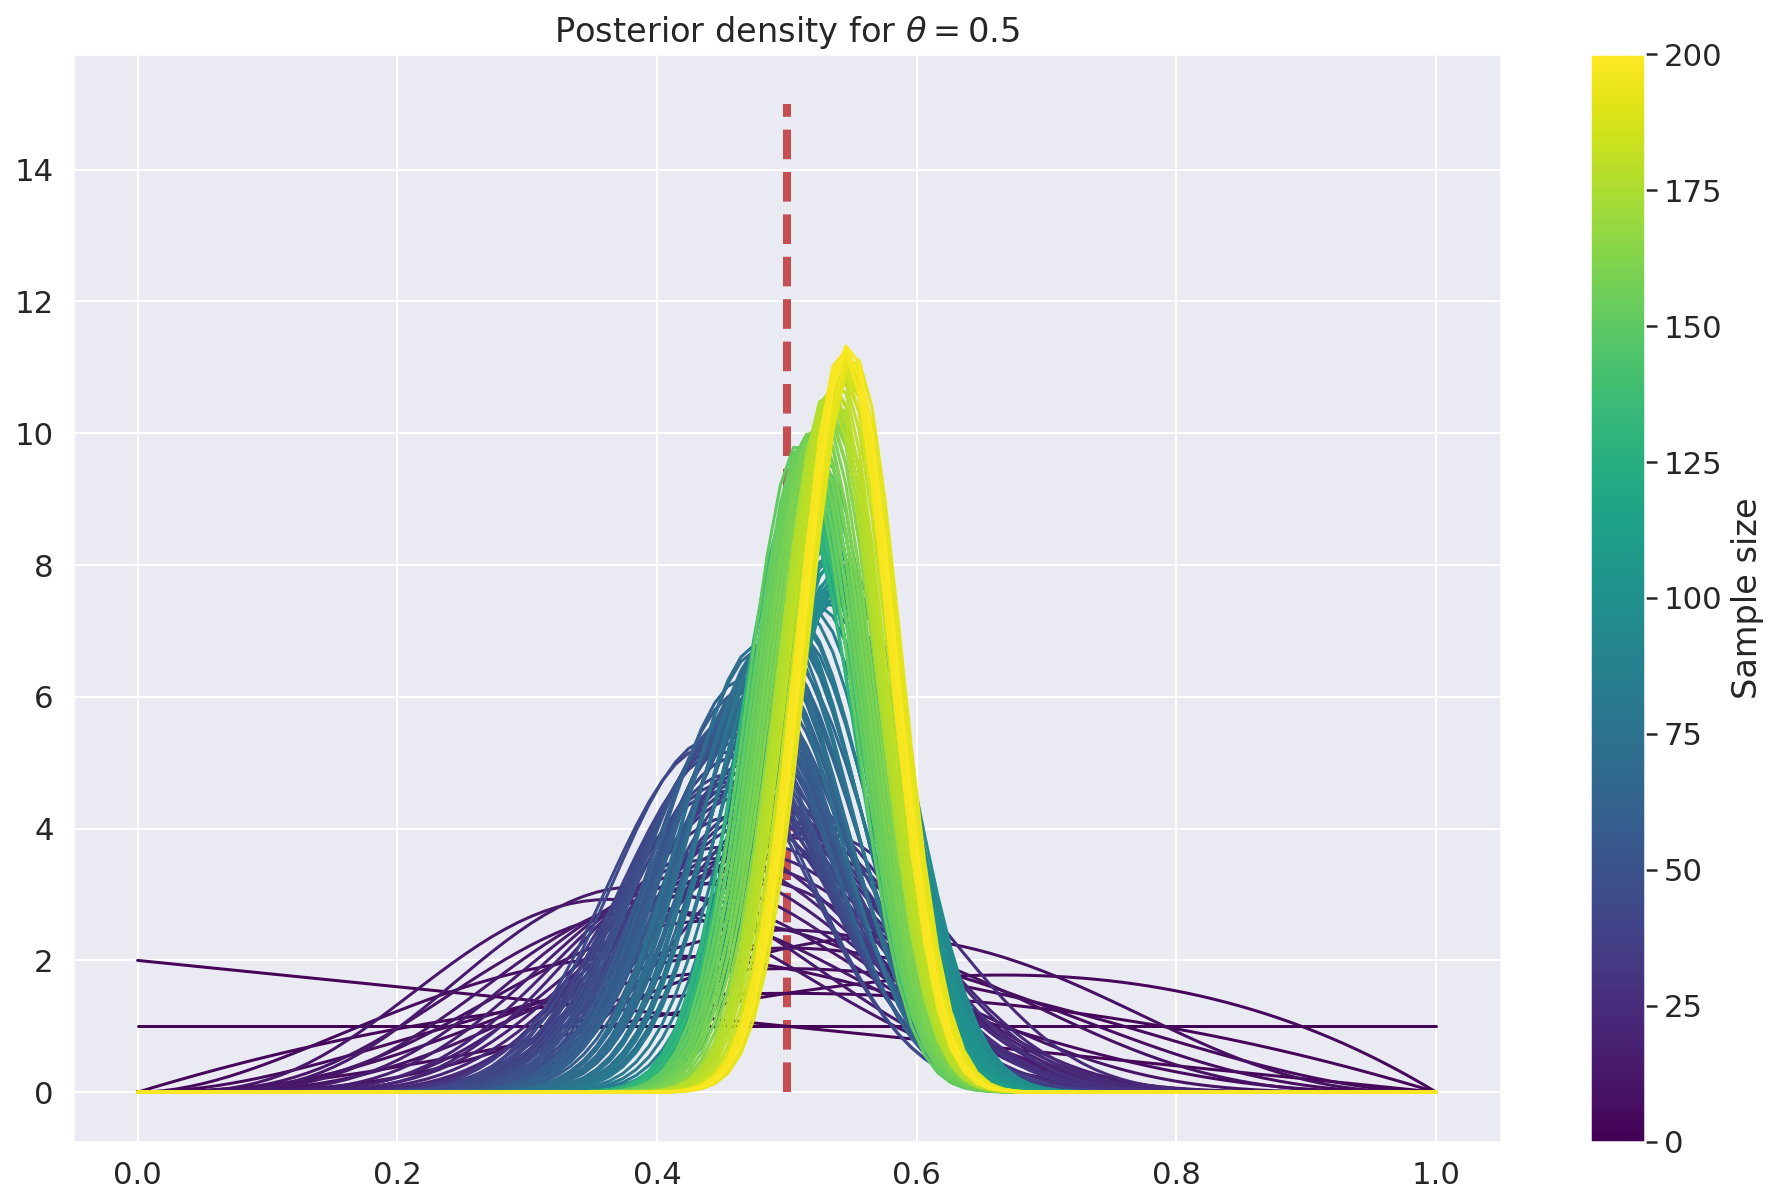

In [ ]:
x = np.linspace(0, 1, 100)
sns.set(style="darkgrid", font_scale=1.4)
palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[1][:i])
    means[1][i] = estimator.mean()
    lower_bound[1][i] = estimator.ppf(alpha/2)
    upper_bound[1][i] = estimator.ppf(1- alpha/2)
    plt.plot(x, estimator.pdf(x), color=palette[i])
norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="Sample size")
plt.title(r"Posterior density for $\theta = 0.5$")
plt.vlines(0.5, 0, 15, linestyle="dashed", colors="r", linewidth=4)
plt.show()

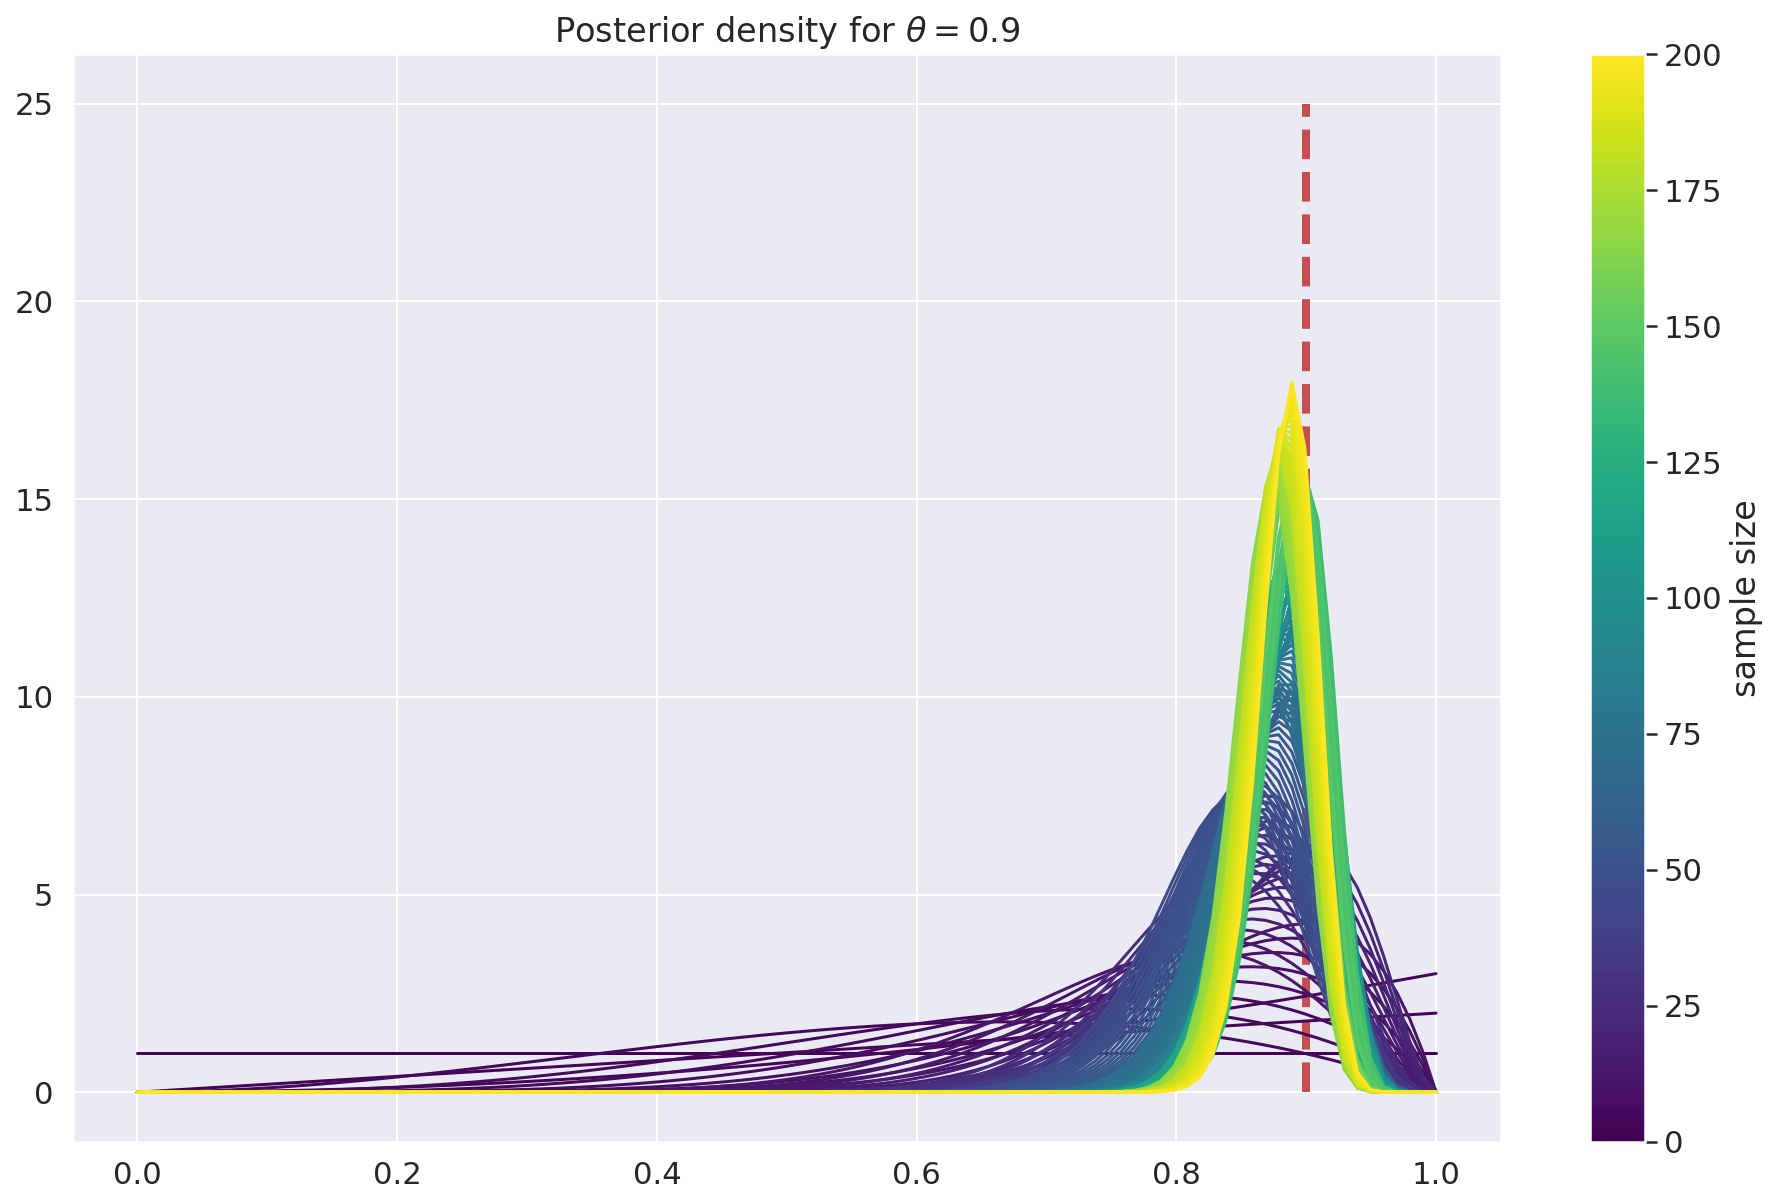

In [ ]:
x = np.linspace(0, 1, 100)
sns.set(style="darkgrid", font_scale=1.4)
palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[2][:i])
    means[2][i] = estimator.mean()
    lower_bound[2][i] = estimator.ppf(alpha/2)
    upper_bound[2][i] = estimator.ppf(1- alpha/2)
    plt.plot(x, estimator.pdf(x), color=palette[i])
norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="sample size")
plt.title(r"Posterior density for $\theta = 0.9$")
plt.vlines(0.9, 0, 25, linestyle="dashed", colors="r", linewidth=4)
plt.show()

Постройте график среднего для апостериорного распределения и 95% доверительный интервал для всех выборок в зависимости от $n$ (каждая выборка своим цветом). Интервал для какой выборки почти для всех $n$ самый узкий? С чем это связано?

**Ответ:** Для выборки с $\theta = 0.9$ интервал для почти всех $n$ самый узкий, скорее всего из-за формул для параметров апостериорного распределения. Так как в них участвует сумма $X_i$, а для параметра $\theta=0.9$ единичек в выборке встречаются сильно чаще, из-за этого параметры возрастают сильнее и из-за этого вид $Beta$ распределения меняется сильнее - у него более легкие хвосты и меньшая дисперсия.

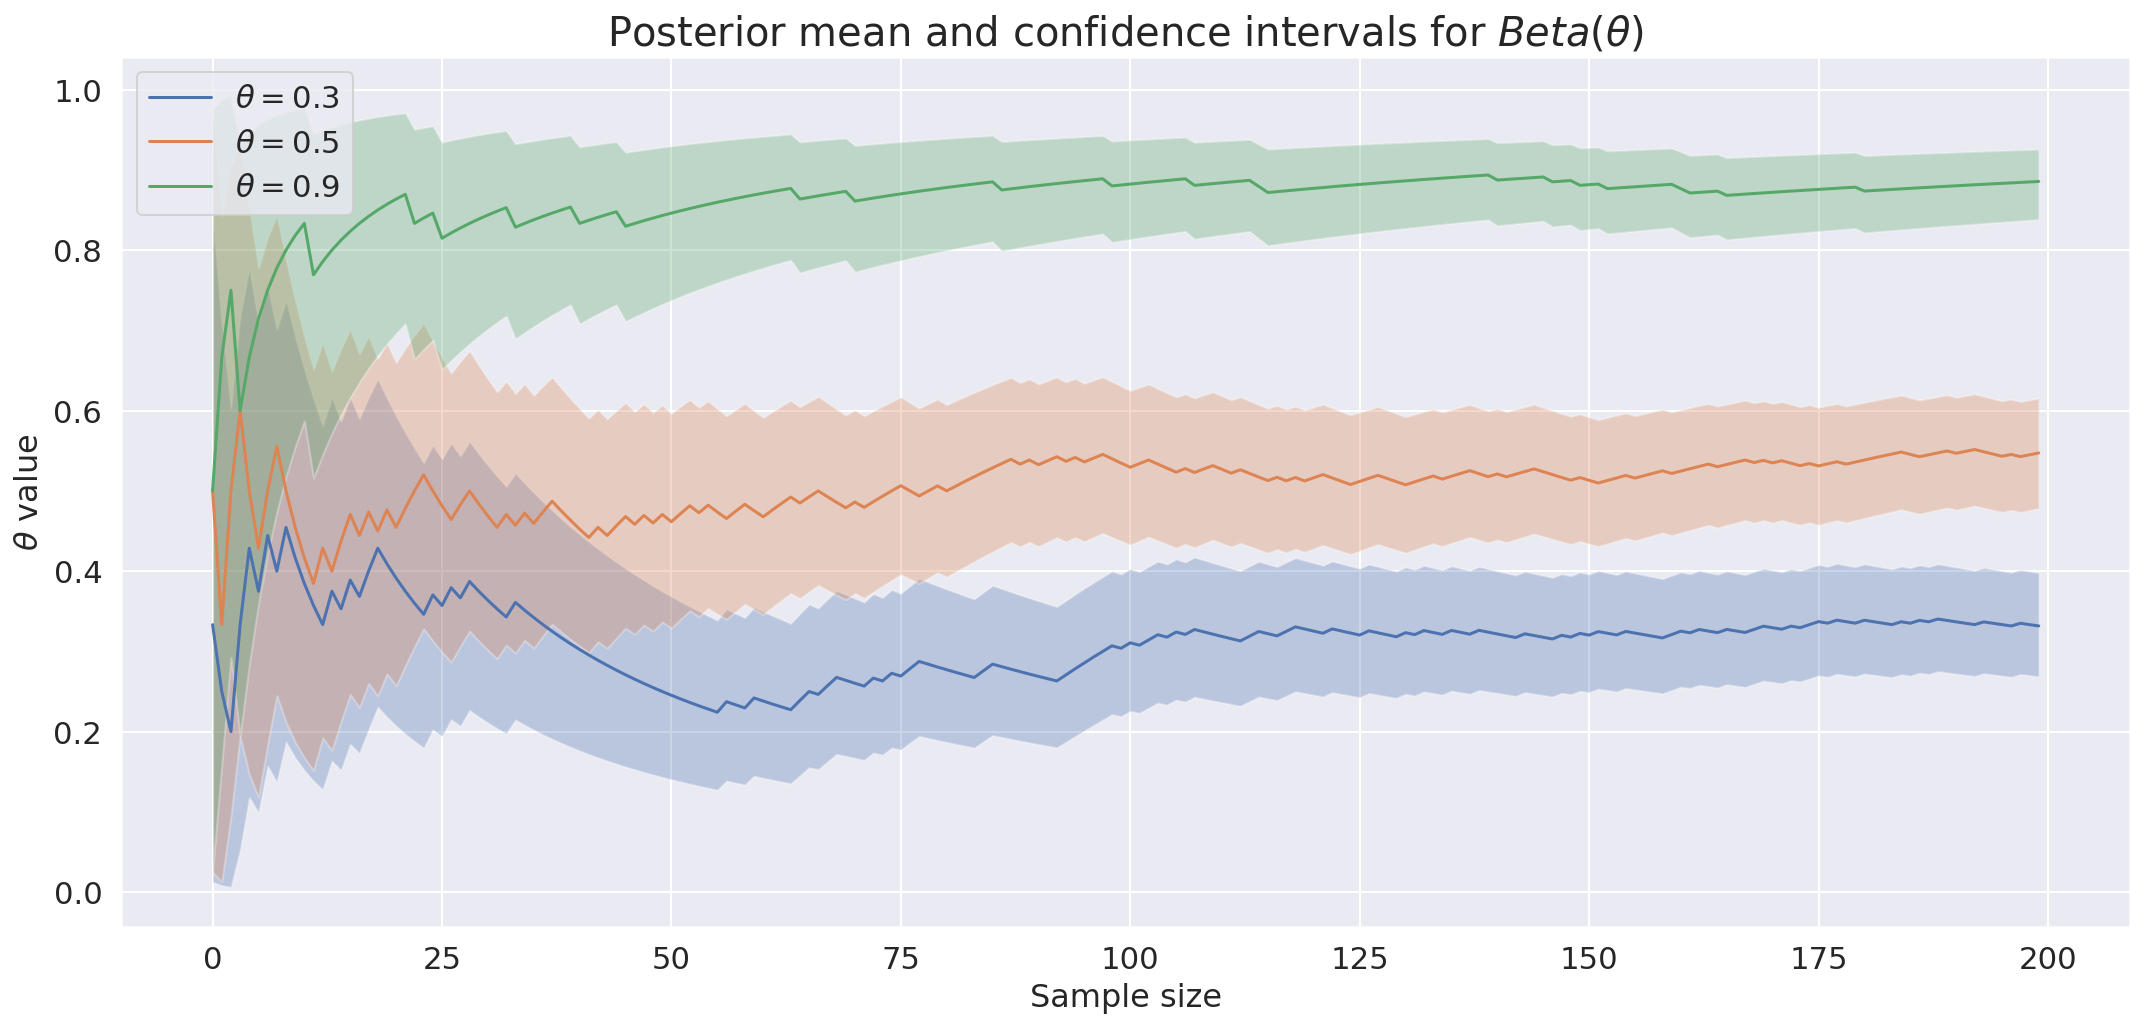

In [ ]:
fig, axis = plt.subplots(figsize=(18,8))
plt.title(r'Posterior mean and confidence intervals for $Beta(\theta)$', fontsize=20)
grid = np.arange(SAMPLE_SIZE)
for i, theta in enumerate(thetas):
  plt.plot(grid, means[i], label=fr'$\theta={theta}$')
  plt.fill_between(x=grid, y1=upper_bound[i], y2=lower_bound[i], alpha=0.3)

axis.set_xlabel('Sample size', fontsize=16)
axis.set_ylabel(r'$\theta$ value', fontsize=16)
plt.legend()
plt.show()

б) Раздающий на экзамене.

Представьте, что вы раздающий на экзамене который принимают два преподавателя. Так уж случилось, что вы знаете все оценки, которые ставят преподаватели. У каждого из преподавателей есть плохое и хорошее настроение, которое может внезапно меняться (заранее предугадать нельзя). Настроение находится в интервале $(0;1)$ и является вероятности поставить положительную оценку. Ваша задача выбрать к какому из преподавателей направлять студентов каждый раз. Считаем, что студент может получить только положительную оценку (1) или отрицательную (0). Считаем, что вы добрый раздающий и что если один или больше из преподавателей сидит без дела, то это нормально. 

In [ ]:
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)


class Professor:
    def __init__(self, mood=0.5):
        self.mood = mood

    def step(self) -> int:
        return sps.bernoulli(self.mood).rvs()

In [ ]:
np.random.seed(42)
professors = [Professor(mood=sps.uniform().rvs()) for i in range(10)]

Итак, будем считать, что у нас есть 1000 студентов (для более точного подсчета). 
Начнем с простого. Давайте попробуем случайно распределять студентов.

In [ ]:
alphas = np.ones(10)
betas = np.ones(10)

num_students = 10000

cum_retakes_random = []

for i in range(num_students):
    idx = np.random.randint(10)
    cur_est = professors[idx].step()
    if cur_est == 1:
        alphas[idx] += 1
    else:
        betas[idx] += 1
    cum_retakes_random.append(betas.sum() - 10)
        
print(f"Вероятность сдать: {(alphas.sum() - 10)/num_students}")

Вероятность сдать: 0.5181


Давайте попробуем улучшить наш алгоритм. Будем брать случайного преподавателя с вероятностью $\varepsilon$, а с вероятностью $(1-\varepsilon)$ выбирать преподавателя, который с наибольшей вероятностью поставит студенту положительную оценку на текущий момент.

![](https://i.ibb.co/nPDLfJ2/2020-11-16-19-16-11.png)

Для нас $r_t \in \{0;1\}$ -- результат экзамена.

In [ ]:
eps=0.05

alphas = np.ones(10)
betas = np.ones(10)

num_students = 10000

cum_retakes_greedy = []

for i in range(num_students):
    indicator = sps.bernoulli(eps).rvs(size=1)
    idx = None
    if indicator == 1: # with eps probability
        idx = np.random.randint(10)
    else:
        idx = np.argmax(alphas / (alphas + betas))
    
    cur_est = professors[idx].step()
    if cur_est == 1:
        alphas[idx] += 1
    else:
        betas[idx] += 1

    cum_retakes_greedy.append(betas.sum() - 10)
        
print(f"Вероятность сдать: {(alphas.sum() - 10)/num_students}")

Вероятность сдать: 0.9309


Теперь давайте попробуем поступать следующим образом. Для каждого принимающего будем хранить апостериорное распрееления (в виде параметров $\alpha$ и $\beta$ для бета-распределения). На каждой из итераций будем сэмплировать одно число из этих распределений и выберем преподователя с максимальным засэмплированым числом.

Подробнее:

![](https://i.ibb.co/HC2rXHm/2020-11-16-19-12-29.png)



In [ ]:
alphas = np.ones(10)
betas = np.ones(10)

cum_retakes_bayes = []

for i in range(num_students):
    sampled_values = np.zeros(10)
    for id in range(len(professors)):
      sampled_values[id] = sps.beta(alphas[id], betas[id]).rvs(size=1)
    idx = np.argmax(sampled_values)
    cur_est = professors[idx].step()
    if cur_est == 1:
        alphas[idx] += 1
    else:
        betas[idx] += 1
    cum_retakes_bayes.append(betas.sum() - 10)
        
print((alphas.sum() - 10)/num_students)

0.9475


Постройте график в котором по оси $x$ отложено число студентов (число наблюдений), а по оси $y$ число пересдач на момент, соотвтствующий числу наблюдений.

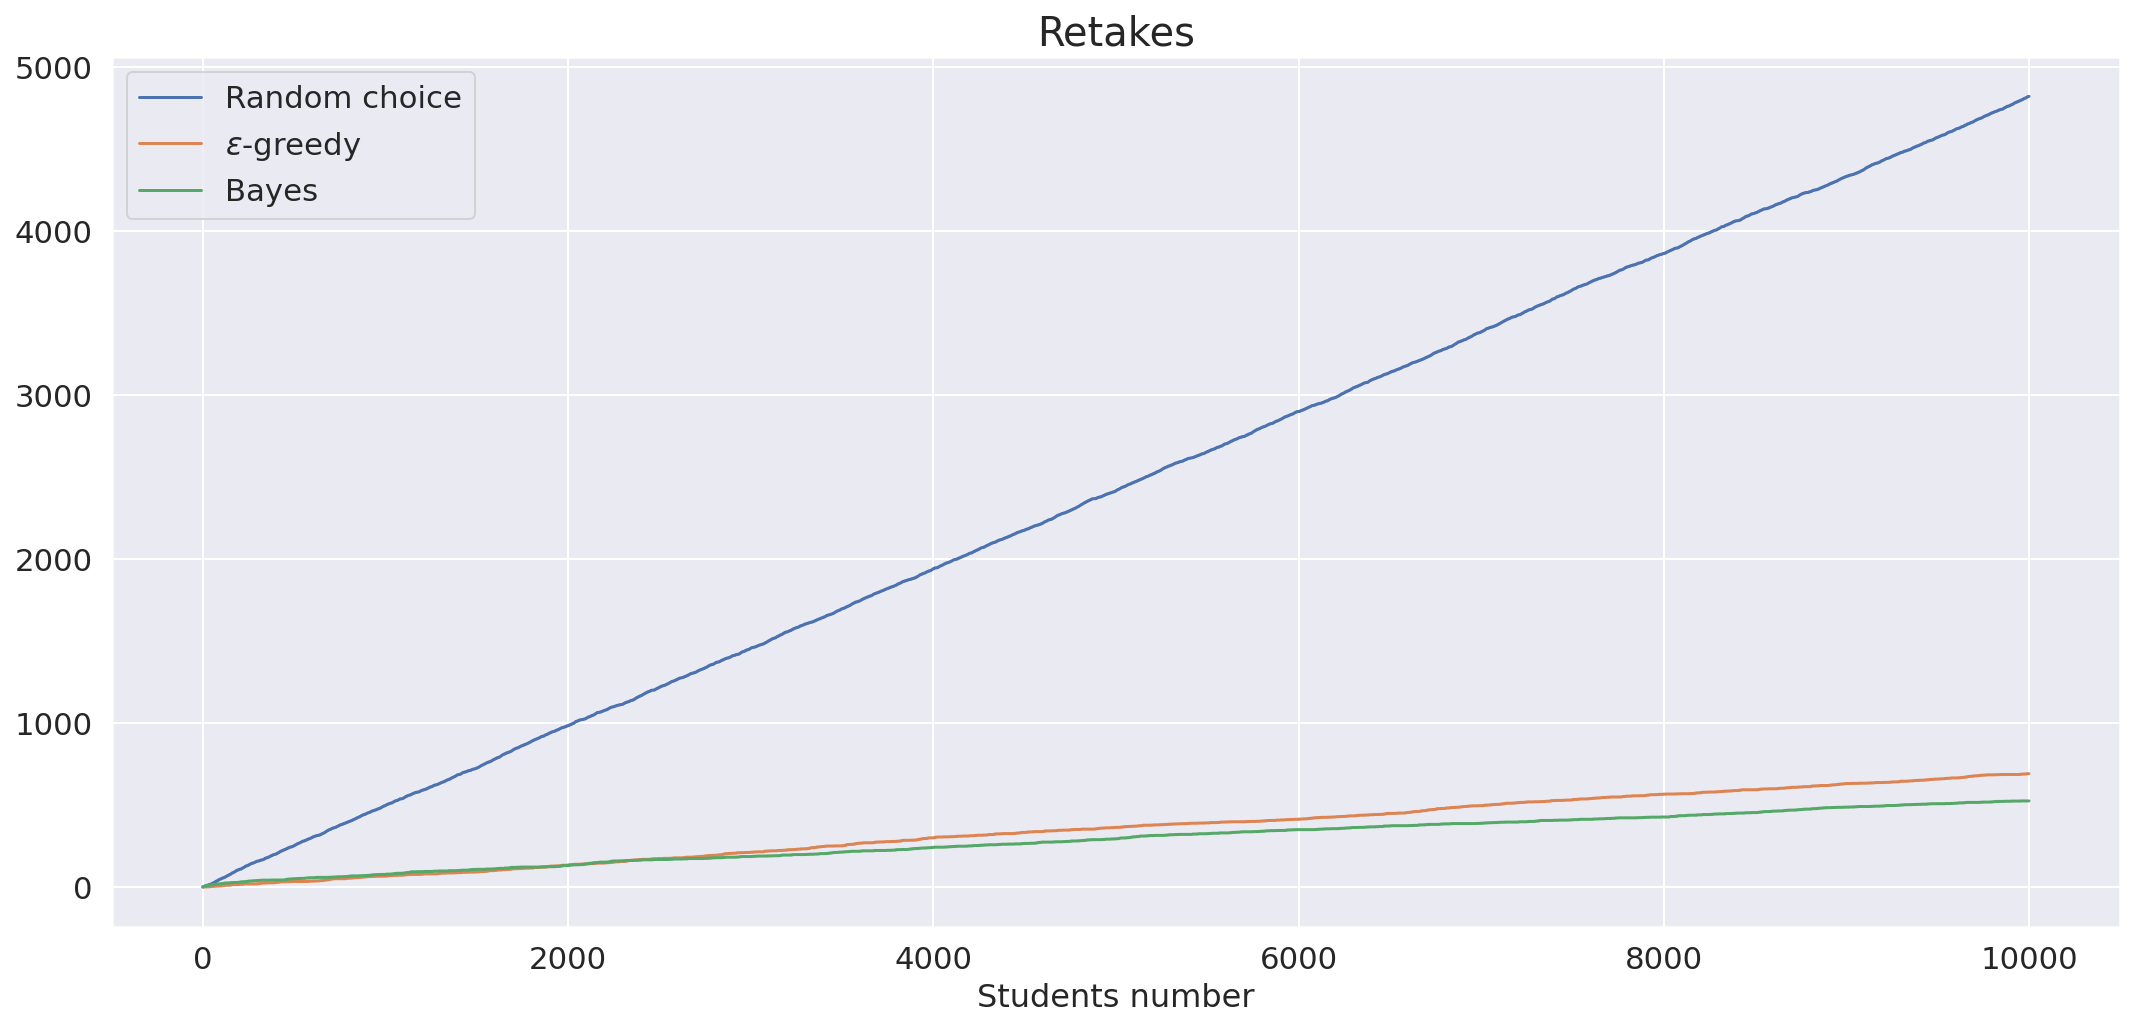

In [ ]:
fig, axis = plt.subplots(figsize=(18,8))
plt.title('Retakes', fontsize=20)
grid = np.arange(num_students)
plt.plot(grid, cum_retakes_random, label='Random choice')
plt.plot(grid, cum_retakes_greedy, label=r'$\varepsilon$-greedy')
plt.plot(grid, cum_retakes_bayes, label='Bayes')

axis.set_xlabel('Students number', fontsize=16)
plt.legend()
plt.show()

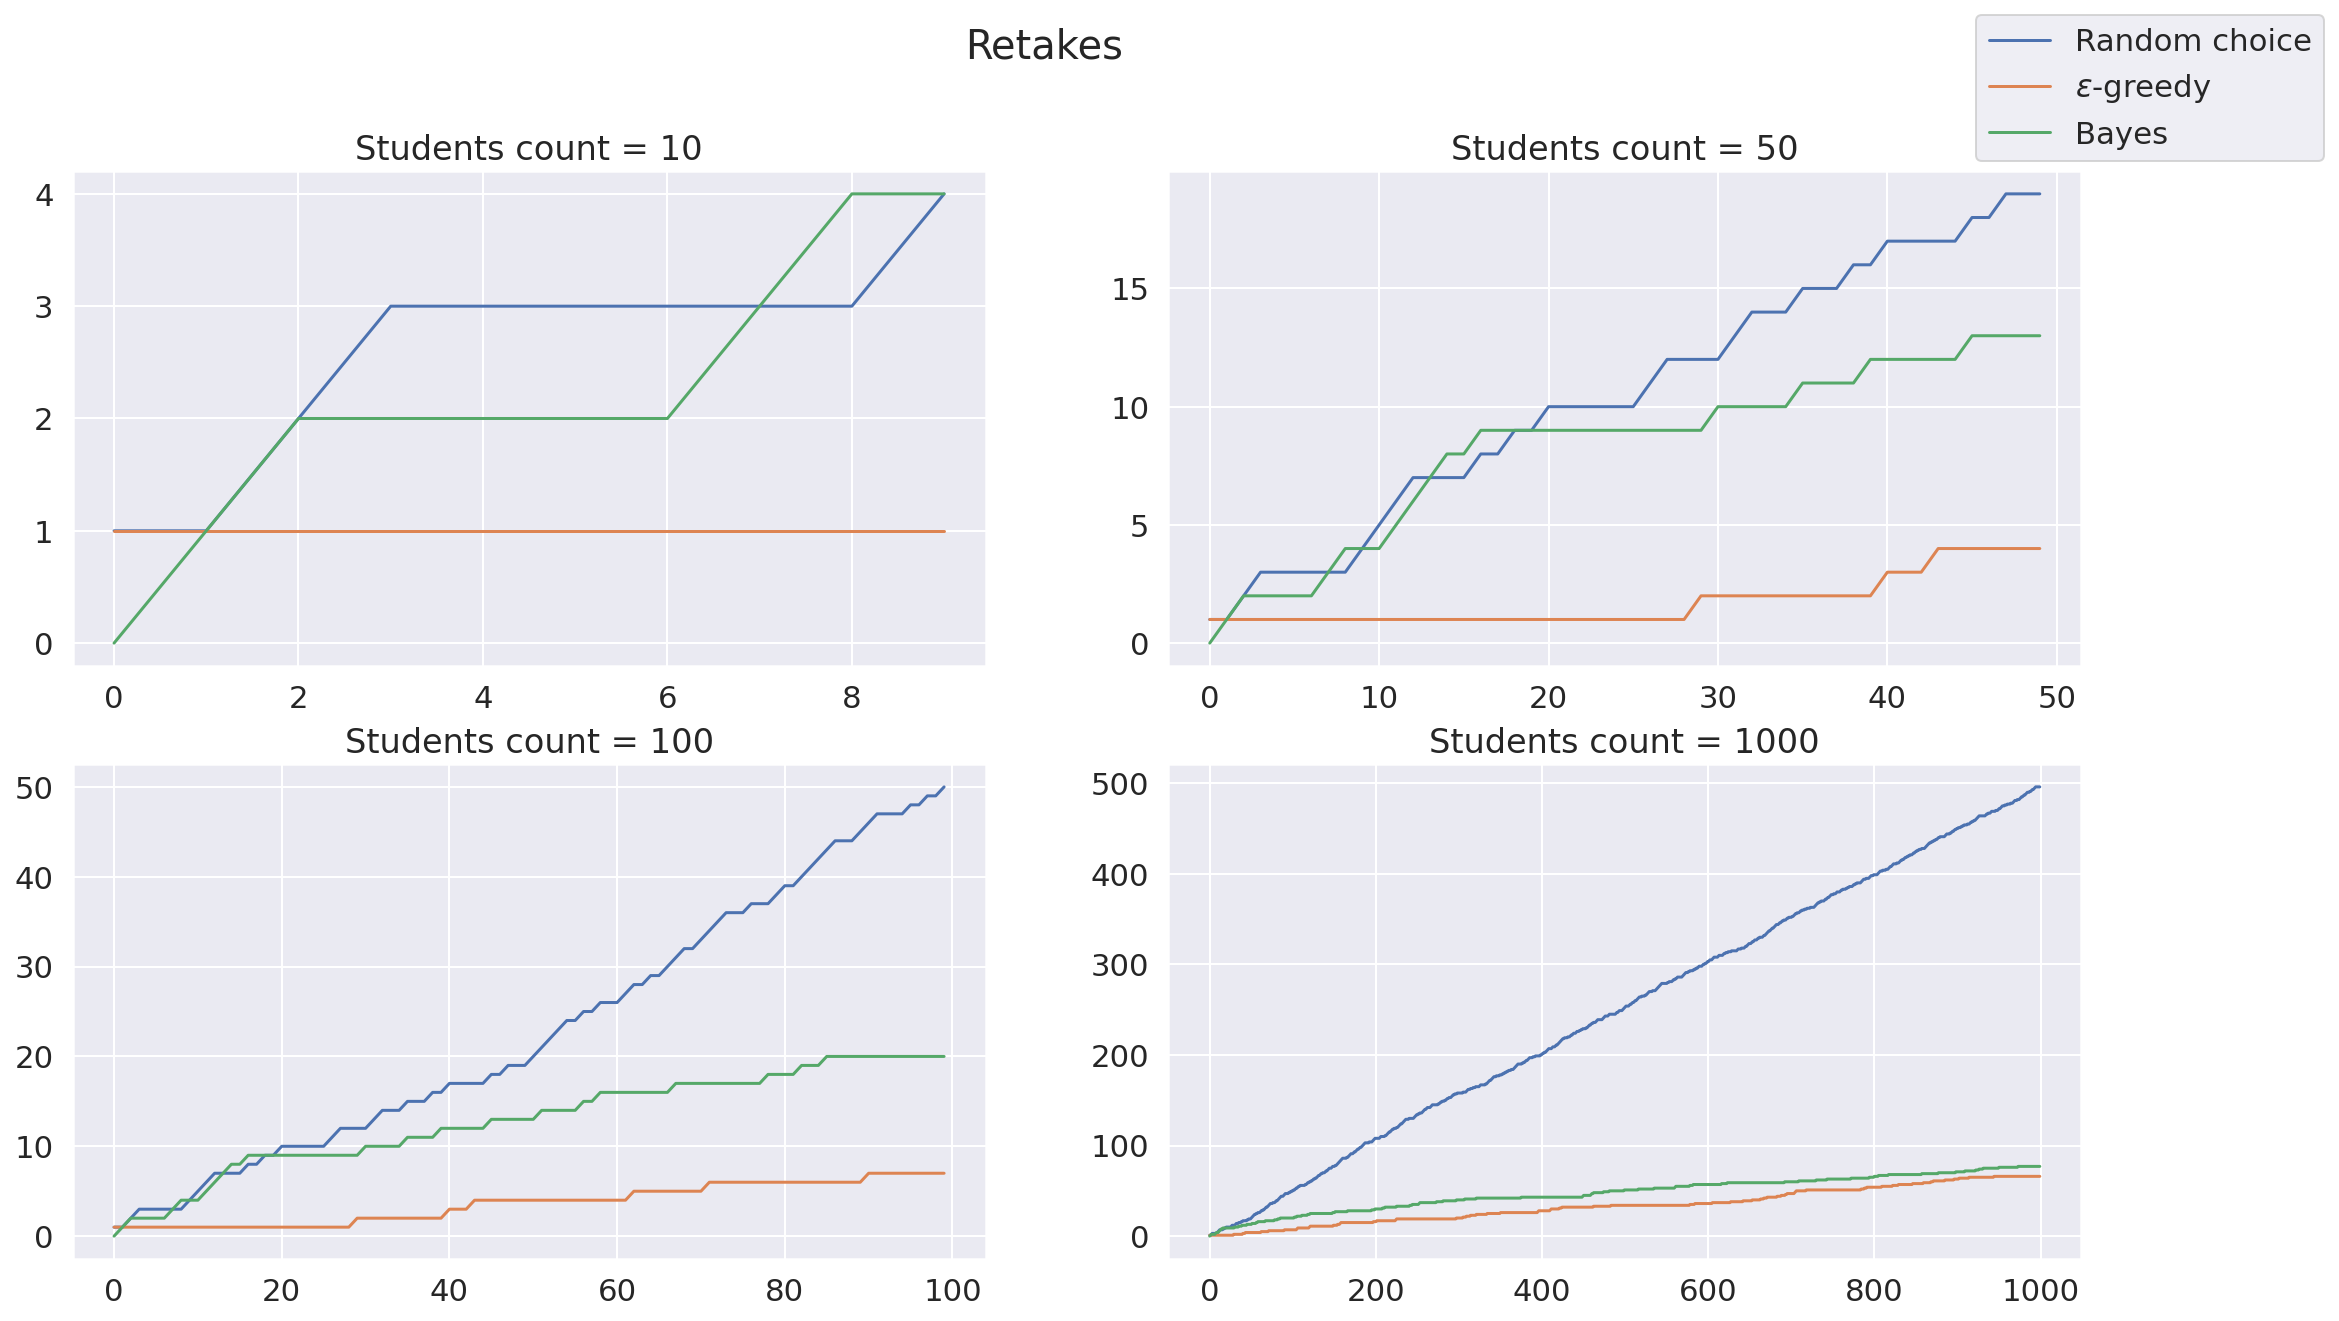

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
plt.suptitle('Retakes', fontsize=20)
students_count = [10, 50, 100, 1000]
for i, count in enumerate(students_count):
  grid = np.arange(count)
  axis[i // 2, i % 2].plot(grid, cum_retakes_random[:count], label='Random choice')
  axis[i // 2, i % 2].plot(grid, cum_retakes_greedy[:count], label=r'$\varepsilon$-greedy')
  axis[i // 2, i % 2].plot(grid, cum_retakes_bayes[:count], label='Bayes')
  axis[i // 2, i % 2].set_title(f'Students count = {count}')


lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)][:3]
lines, labels = lines[:3], labels[:3]
fig.legend(lines, labels)
plt.show()

Какая стратегия проявила себя лучше остальных? Как вы думаете, почему? Какую стратегию стоит выбирать в зависимости от числа наблюдений (если у нас 10, 50, 100, 1000 студентов)? Постройте графики с соответсвующими `plt.xlim` чтобы ответить на этот вопрос.

**Ответ:** Как мы видим примерно до 1000 студентов $\varepsilon$ - greedy алгоритм показывает себя лучше – количество пересдач меньше. При большем количестве наблюдений bayes показывает лучший результат.

## Задание 3 (Мощность критерия) (10 баллов)

В реальной жизни аналитика самая распространенная задача это A/B-тестирование. Оно применяется практически везде, где это возможно. Идея проста: разбиваем людей на две группы A и B. Группе A мы даем продукт без изменений (принято называть эту группу `placebo`, даже когда речь не идет о медицине), а группе B (`treatment`) мы даем продукт, с каким-то изменением. Мы хотим понять, полезно ли нам предложенное изменение. Поэтому мы считаем какую-то метрику для двух этих групп и пытаемся понять, значимо ли изменение. Однако важный вопрос понять необходимый размер групп A и B.


Давайте представим себе такой случай: студент ведет два паблика с мемами. Один про лектора по статам, а другой про лектора по теории меры. Но наступает сессия, и времени у него остается немного, поэтому он думает о том чтобы закрыть первый паблик, потому что мемы в нем уже не актуальны и лайкают их мало. Вы, как опытный эксперт, можете довольно точно прикинуть распределение лайков под записями. По вашему мнению оба распределения нормальные. Для первого паблика: $\mu_1 = 35$ $\sigma_1 = 30$, для второго: $\mu_2 = 55$ $\sigma_2 = 30$. Считаем, что аудитории пабликов не пересекаются. Вы хотите убедить студента, что ему выгодно закрывать именно первый паблик и сконцентрироваться на втором, но он вам не верит и требует статистически доказать правоту: он требует, чтобы мощность критерия была не менее не менее $0.95$, а уровень значимости $\alpha = 0.05$. Вы предлагаете ему следующий сценарий: чтобы избежать влияние других факторов нужно выкладывать мемы в двух пабликах одновременно раз в день. Необходимо понять сколько дней требуется для подведения итогов.

Введем обозначения для количества лайков: $X$ ~ $N(\mu_1, \sigma^2_1)$; $Y$ ~ $N(\mu_2, \sigma^2_2)$.

$\sigma^2_1 = \sigma^2_2 = \sigma^2$

Для проверки гиоптезы вы предложили воспользоваться Z-критерием для односторонней альтернативы:

$H_0: \mu_1 = \mu_2$ vs $H_1: \mu_2 > \mu_1$.

Статистика этого критерия выглядит так: $$\dfrac{\overline{Y} - \overline{X}}{\sigma / \sqrt{n}} = \dfrac{\overline{Y}}{\sigma/\sqrt{n}} - \dfrac{\overline{X}}{\sigma / \sqrt{n}}.$$

Напишите функцию которая строит плотности $\overline{X}$ и $\overline{Y}$ в зависимости от $n$ красным и синим цветом соответственно. **Не гистограмму или kde, а именно теоретическую плотность.** Так же закрасьте область соответствующую ошибке первого рода красным ($\alpha$), а ошибке второго рода синим ($\beta$) (`plt.fill_between`). В заголовке напишите мощность критерия ($1 - \beta$).

Должен получится примерно такой график:

![](https://i.ibb.co/m032vj1/Unknown-3.png)



In [ ]:
def plot_power_and_pvalue(
    n: int = 100, 
    mu_1: float = 35, 
    mu_2: float = 55, 
    sigma_1: float = 30, 
    sigma_2: float = 30, 
    alpha: float = 0.05,
    show: bool = True
):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 8))
    assert mu_1 < mu_2 and n > 0


    # plotting colors
    palette = sns.color_palette("muted")
    red_color, blue_color = palette[3], palette[0]

    sigma_n_1, sigma_n_2 = sigma_1 ** 2 / n, sigma_2 ** 2 / n
    first_norm = sps.norm(mu_1, sigma_n_1)
    second_norm = sps.norm(mu_2, sigma_n_2)
    x = np.linspace(-3*sigma_n_1, mu_2+3*sigma_n_2, 400)

    # density for sample mean X and Y
    plt.plot(x, first_norm.pdf(x), color=red_color, label='First group') 
    plt.plot(x, second_norm.pdf(x), color=blue_color, label='Second group')

    # according to the required alpha level draw a threshold
    threshold = first_norm.ppf(1-alpha)
    plt.vlines(threshold, ymin=0, ymax=first_norm.pdf(mu_1),
               color=red_color, linestyle='dashed', label=r'$\alpha=0.05$')

    # type 1 error
    plt.fill_between(
        x, first_norm.pdf(x),np.zeros_like(x), where=x>threshold, 
        alpha=0.3, color=red_color
    )

    # type 2 error
    plt.fill_between(
        x, second_norm.pdf(x), np.zeros_like(x), where=x<threshold, 
        alpha=0.3, color=blue_color
    )

    # probability to correctly reject first hypothesis
    power = second_norm.sf(threshold) 
    plt.title(f'z test power is {power:.4f}')
    plt.legend()
    plt.show() if show else plt.close()
    return 

Запустите функцию с параметрами по умолчанию для проверки.

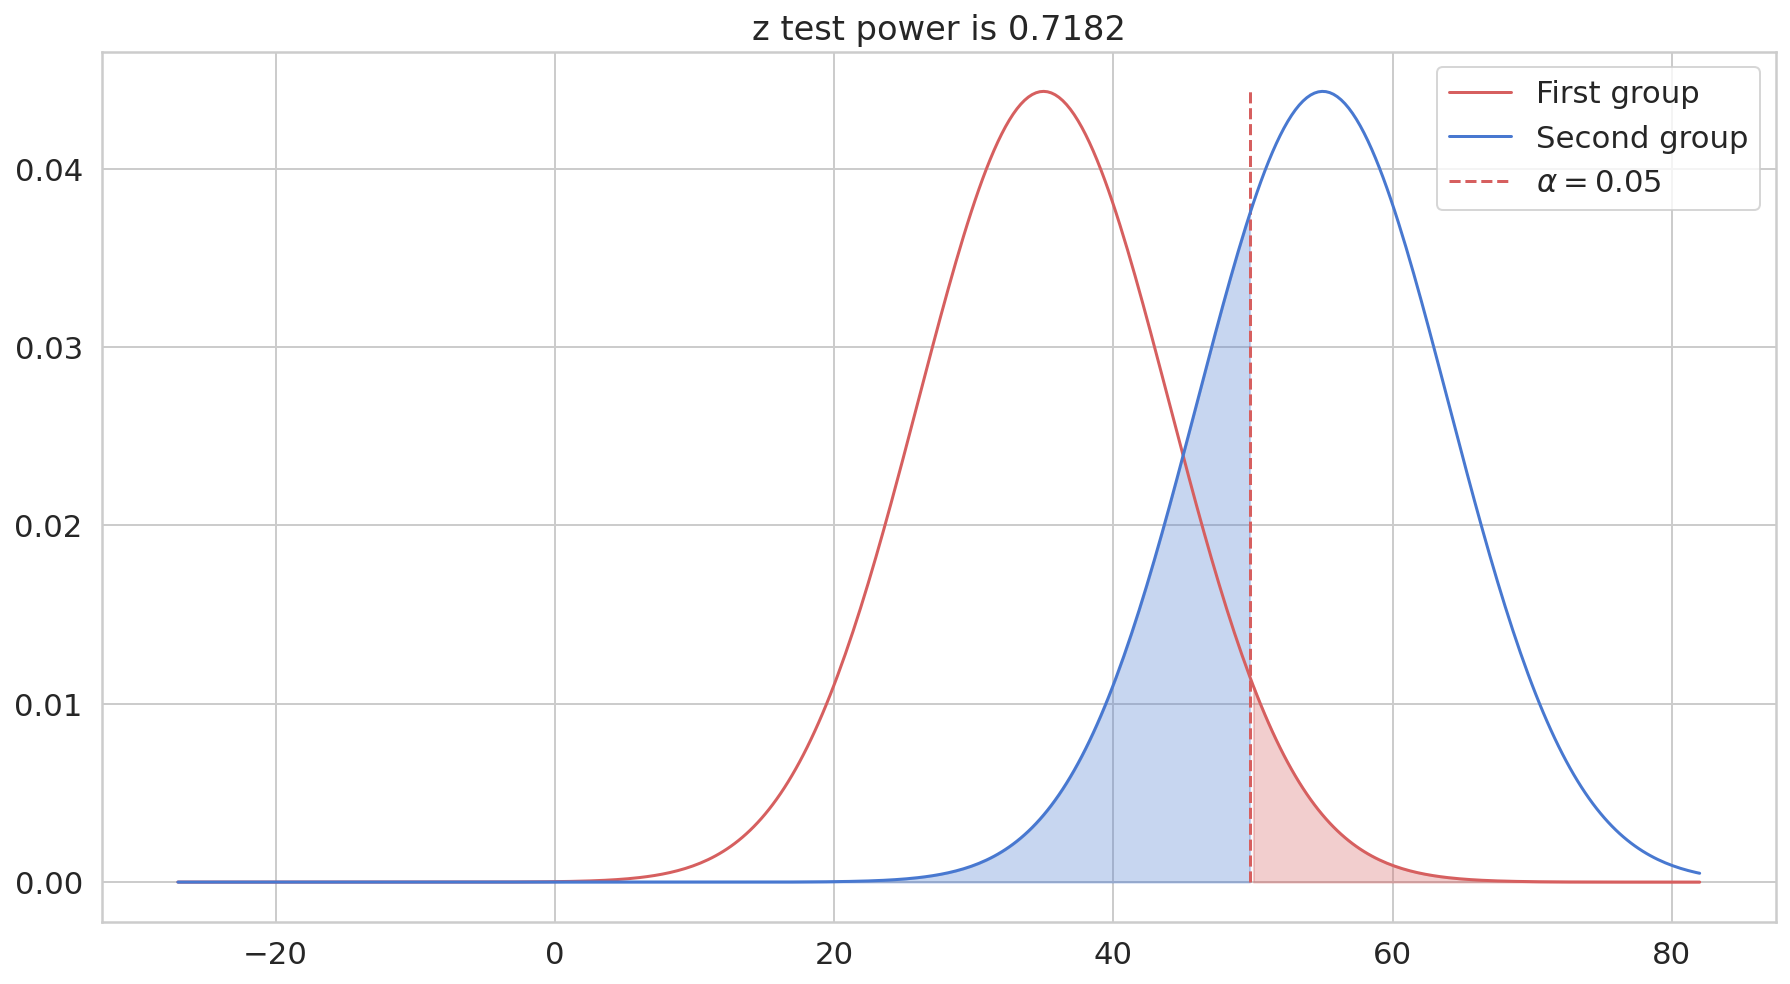

In [ ]:
plot_power_and_pvalue()

Теперь поиграйтесь с ползунком.

In [ ]:
from ipywidgets import interactive
from IPython.display import display

In [ ]:
v = interactive(
    lambda n: plot_power_and_pvalue(n), n=(10, 300)
)

In [ ]:
display(v)

interactive(children=(IntSlider(value=155, description='n', max=300, min=10), Output()), _dom_classes=('widget…

Сколько дней нужно для достижения мощности критерия $\geq 0.95$ на уровне $\alpha=0.05$?

**Ответ:** Результаты иногда немного менялись, но, кажется, для этого необходимо 149 плюс-минус 2 дня .